In [1]:
import warnings
warnings.filterwarnings('ignore')

# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [2]:
import pandas as pd

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Basic exploration
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [3]:
print(customers.describe())
print(products.describe())
print(transactions.describe())


       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [4]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [8]:
print(f'Customer data has {customers.shape[0]} rows and {customers.shape[1]} columns.')
print(f'Products data has {products.shape[0]} rows and {products.shape[1]} columns.')
print(f'Transactions data has {transactions.shape[0]} rows and {transactions.shape[1]} columns.')

Customer data has 200 rows and 4 columns.
Products data has 100 rows and 4 columns.
Transactions data has 1000 rows and 7 columns.


In [11]:
for data in [customers, products, transactions]:
    print(list(data.columns))

['CustomerID', 'CustomerName', 'Region', 'SignupDate']
['ProductID', 'ProductName', 'Category', 'Price']
['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']


In [12]:
products['Price'].value_counts

<bound method IndexOpsMixin.value_counts of 0     169.30
1     346.30
2      44.12
3      95.69
4     429.31
       ...  
95    307.47
96    319.34
97    299.93
98    354.29
99    126.34
Name: Price, Length: 100, dtype: float64>

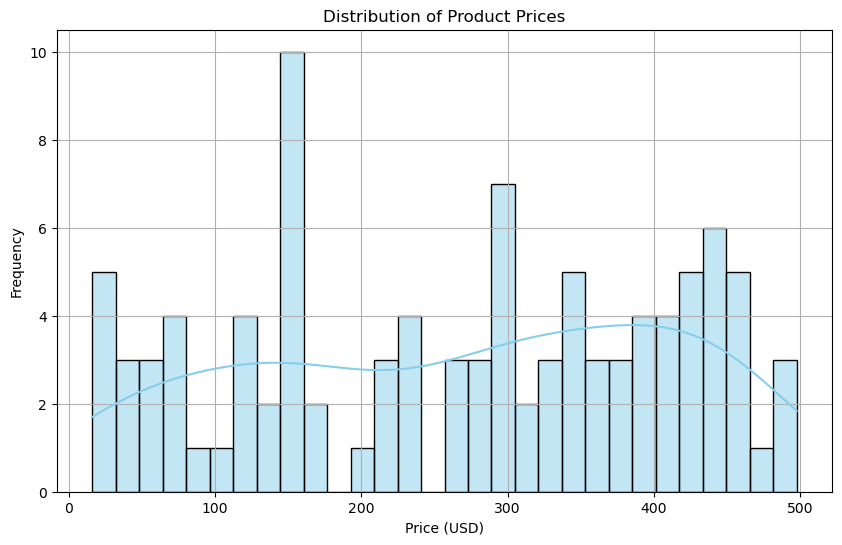

In [13]:
# Plot histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
The region with the most customers is: South America with 59 customers


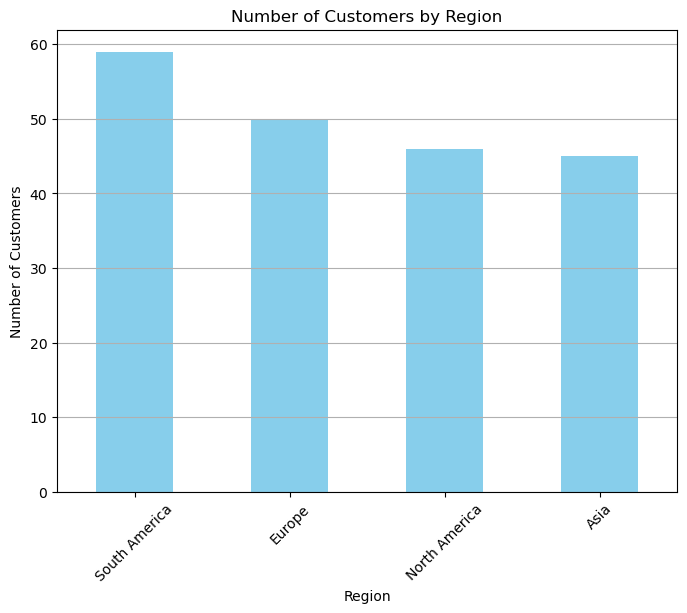

In [20]:

# Count the number of customers in each region
region_counts = customers['Region'].value_counts()
print(region_counts)
# Display the region with the most customers
most_customers_region = region_counts.idxmax()
max_customers_count = region_counts.max()

print(f"The region with the most customers is: {most_customers_region} with {max_customers_count} customers")

# Visualization
plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [21]:
# Insights 1 : Frome the customers.csv we conclude that South America hasmore customer compared to other regions.

The date with the most customer signups is: 2024-11-11 00:00:00 with 3 signups


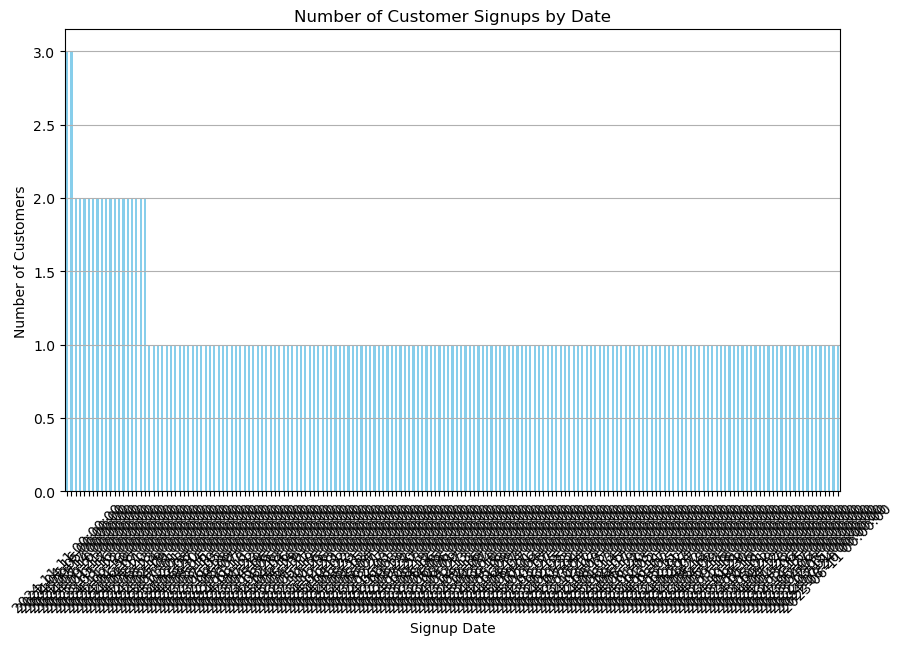

In [23]:


# Convert SignupDate to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Count the number of signups per date
signup_counts = customers['SignupDate'].value_counts()

# Find the date with the most signups
most_signups_date = signup_counts.idxmax()
max_signup_count = signup_counts.max()

print(f"The date with the most customer signups is: {most_signups_date} with {max_signup_count} signups")

# Visualization
plt.figure(figsize=(10, 6))
signup_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Customer Signups by Date')
plt.xlabel('Signup Date')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [30]:
# Count the number of times each item from a category is solved
category = products['Category'].value_counts()
print(category)

most_product_cat = category.idxmax()
max_product_count = category.max()

print(f"The category with the most customers is: {most_product_cat} with {max_product_count} customers")


Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
The category with the most customers is: Books with 26 customers


Average Purchase Value by Category:
       Category  TotalValue
0        Books  711.657296
1     Clothing  728.818684
2  Electronics  711.746063
3   Home Decor  608.443266
Total Purchase Value by Category:
       Category  TotalValue
0        Books   192147.47
1     Clothing   166170.66
2  Electronics   180783.50
3   Home Decor   150893.93
Average Purchase Value by Region:
           Region  TotalValue
0           Asia  697.591606
1         Europe  710.489872
2  North America  624.235246
3  South America  721.554474
Average Purchase Value by Region:
           Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


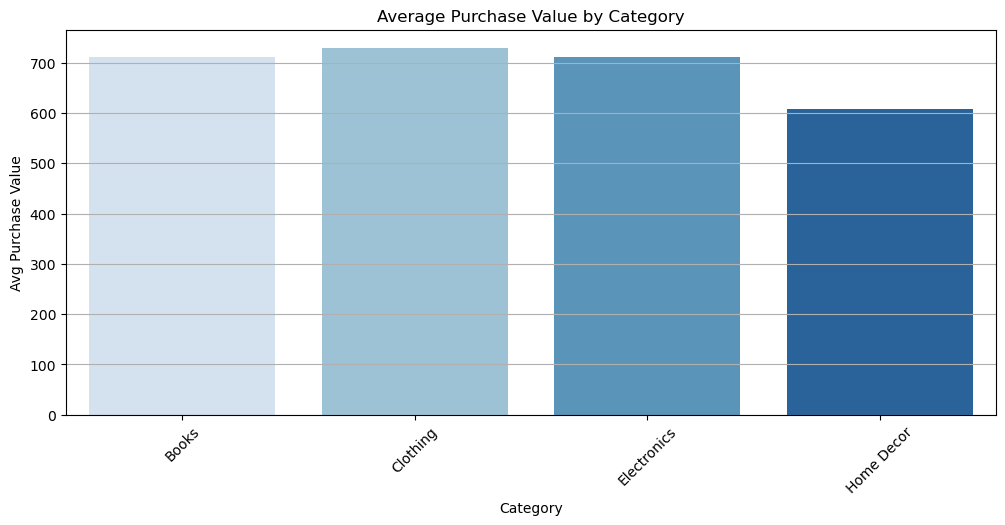

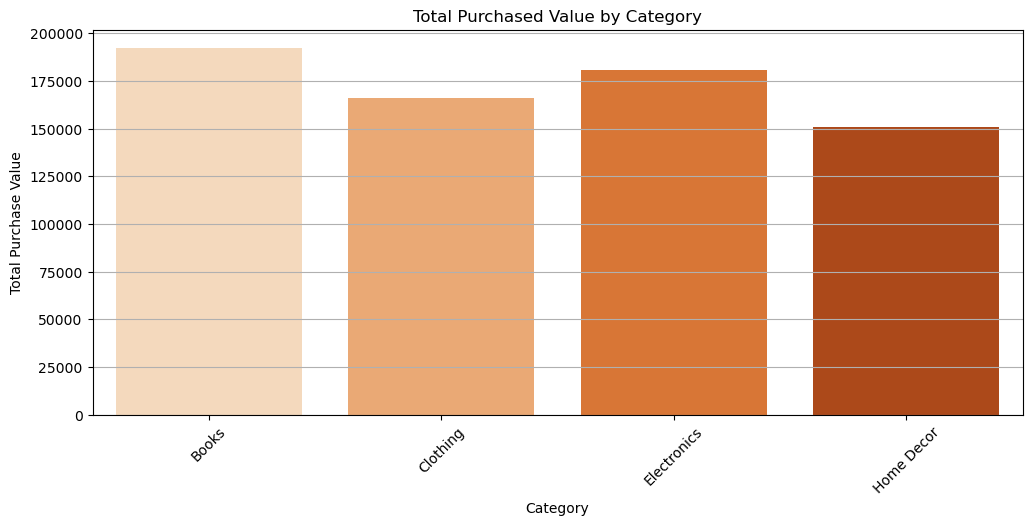

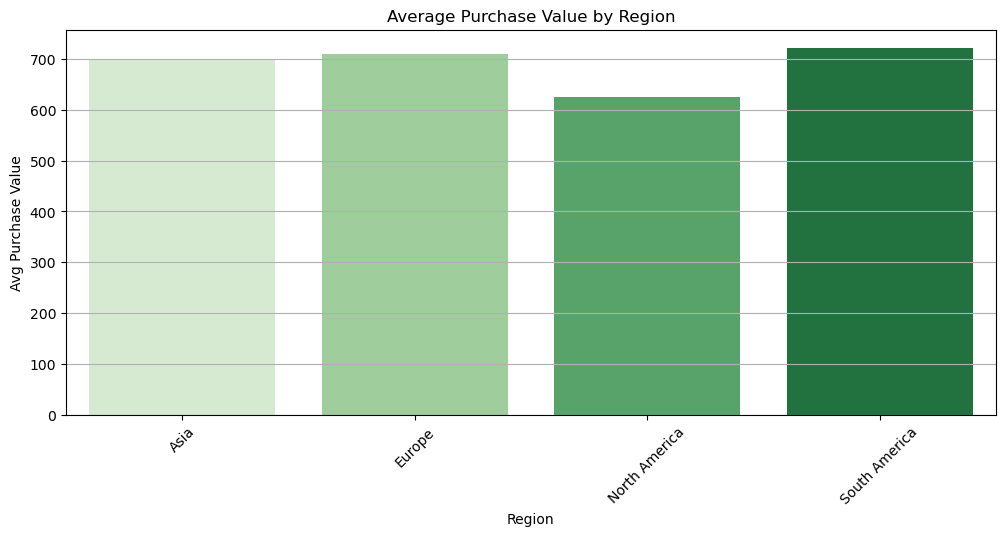

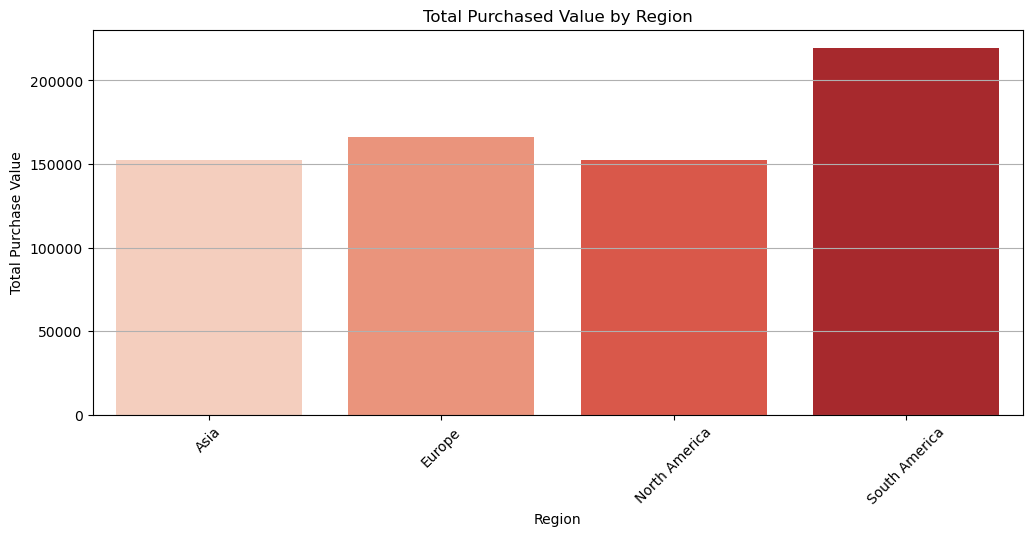

In [38]:
# Merge datasets to include region and category
merged_df = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Calculate sum and  average purchase value per category
category_avg = merged_df.groupby('Category')['TotalValue'].mean().reset_index()
category_total_purchased_value = merged_df.groupby('Category')['TotalValue'].sum().reset_index()
print("Average Purchase Value by Category:\n", category_avg)
print("Total Purchase Value by Category:\n", category_total_purchased_value)

# Calculate  sum and average purchase value per region
region_avg = merged_df.groupby('Region')['TotalValue'].mean().reset_index()
region_total_purchased_value = merged_df.groupby('Region')['TotalValue'].sum().reset_index()
print("Average Purchase Value by Region:\n", region_avg)
print("Average Purchase Value by Region:\n", region_total_purchased_value)

# Visualization - Bar plots for category and region
plt.figure(figsize=(12, 5))
sns.barplot(x='Category', y='TotalValue', data=category_avg, palette='Blues')
plt.title('Average Purchase Value by Category')
plt.xlabel('Category')
plt.ylabel('Avg Purchase Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()





plt.figure(figsize=(12, 5))
sns.barplot(x='Category', y='TotalValue', data=category_total_purchased_value, palette='Oranges')
plt.title('Total Purchased Value by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(12, 5))
sns.barplot(x='Region', y='TotalValue', data=region_avg, palette='Greens')
plt.title('Average Purchase Value by Region')
plt.xlabel('Region')
plt.ylabel('Avg Purchase Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='Region', y='TotalValue', data=region_total_purchased_value, palette='Reds')
plt.title('Total Purchased Value by Region')
plt.xlabel('Region')
plt.ylabel('Total Purchase Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


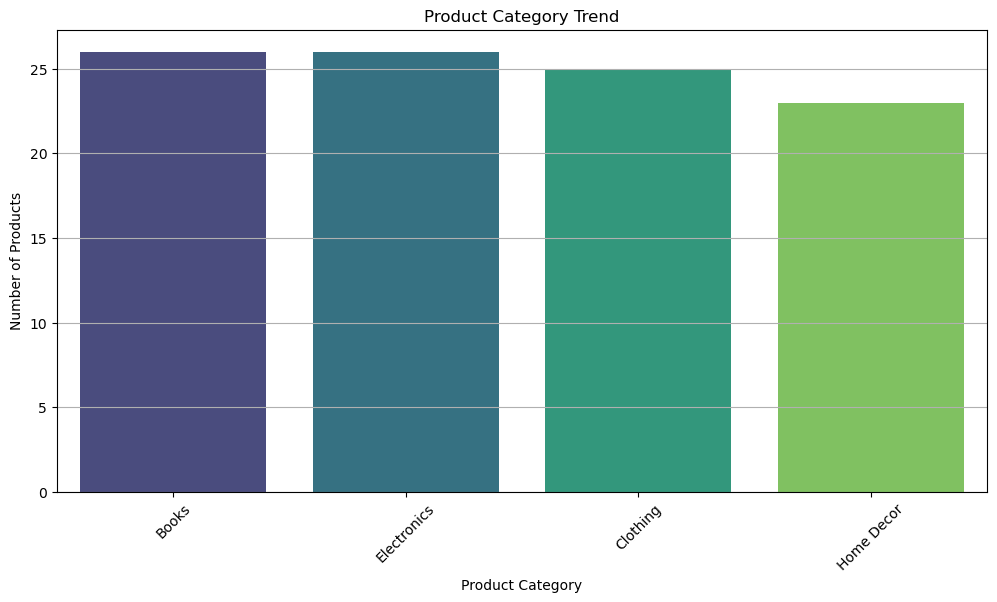

In [46]:
# Count occurrences of each category
category_counts = products['Category'].value_counts().sort_values(ascending=False)

# Print category counts
print(category_counts)

# Bar chart to visualize the trend
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Product Category Trend')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



   Year  Quarter  TransactionCount
0  2023        4                 4
1  2024        1               264
2  2024        2               241
3  2024        3               286
4  2024        4               205


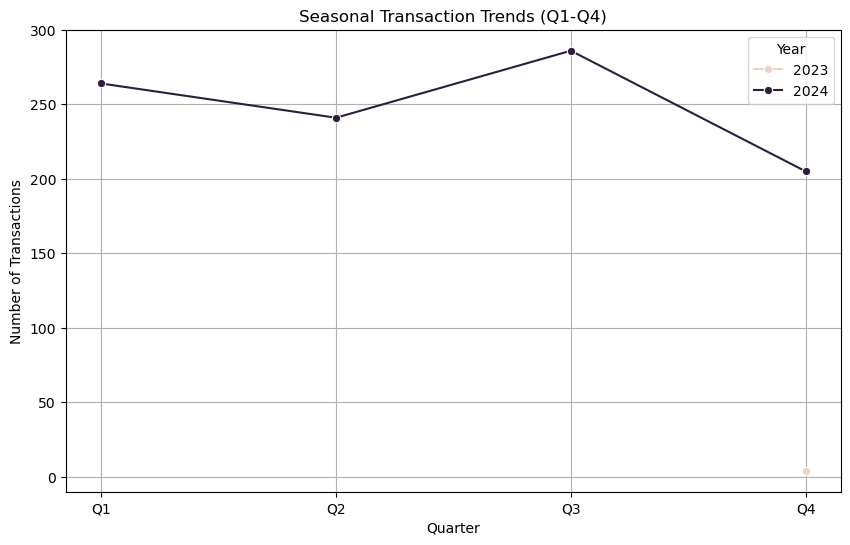

In [42]:


# Convert TransactionDate to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extract year and quarter from the date
transactions['Year'] = transactions['TransactionDate'].dt.year
transactions['Quarter'] = transactions['TransactionDate'].dt.quarter

# Group by year and quarter, count number of transactions
quarterly_trends = transactions.groupby(['Year', 'Quarter']).size().reset_index(name='TransactionCount')

# Print transaction count for each quarter
print(quarterly_trends)

# Visualize the seasonal trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=quarterly_trends['Quarter'], y=quarterly_trends['TransactionCount'], hue=quarterly_trends['Year'], marker='o')

plt.title('Seasonal Transaction Trends (Q1-Q4)')
plt.xlabel('Quarter')
plt.ylabel('Number of Transactions')
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.grid(True)
plt.legend(title='Year')
plt.show()


Highest Purchased Category in Each Region:
           Region     Category  TotalValue
1            Asia     Clothing    49353.09
4          Europe        Books    47464.42
10  North America  Electronics    44716.43
12  South America        Books    69752.03


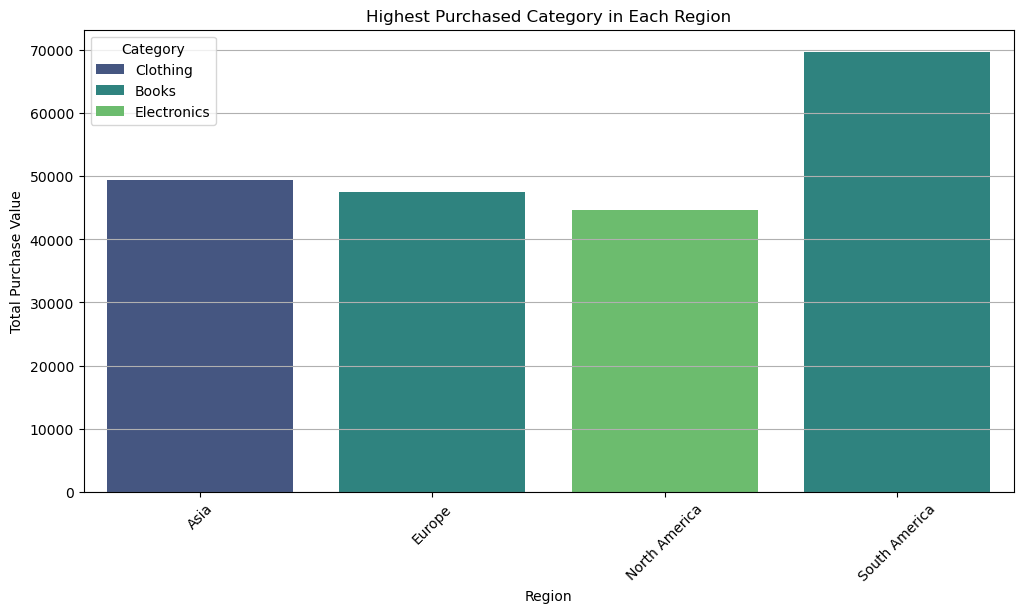

In [47]:

# Merge datasets to include region and category
merged_df = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Group by Region and Category, then sum up the TotalValue
region_category_sales = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

# Find the highest purchased category in each region
highest_category_per_region = region_category_sales.loc[region_category_sales.groupby('Region')['TotalValue'].idxmax()]

# Print the results
print("Highest Purchased Category in Each Region:")
print(highest_category_per_region)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='TotalValue', hue='Category', data=highest_category_per_region, palette='viridis')
plt.title('Highest Purchased Category in Each Region')
plt.xlabel('Region')
plt.ylabel('Total Purchase Value')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.grid(axis='y')
plt.show()


           Region     Category  PurchaseCount  TotalPurchaseValue  \
0            Asia        Books             51            33119.03   
1            Asia     Clothing             58            49353.09   
2            Asia  Electronics             57            35658.15   
3            Asia   Home Decor             52            33944.70   
4          Europe        Books             64            47464.42   
5          Europe     Clothing             47            36335.59   
6          Europe  Electronics             58            41562.60   
7          Europe   Home Decor             65            40892.02   
8   North America        Books             65            41811.99   
9   North America     Clothing             60            38038.49   
10  North America  Electronics             60            44716.43   
11  North America   Home Decor             59            27746.49   
12  South America        Books             90            69752.03   
13  South America     Clothing    

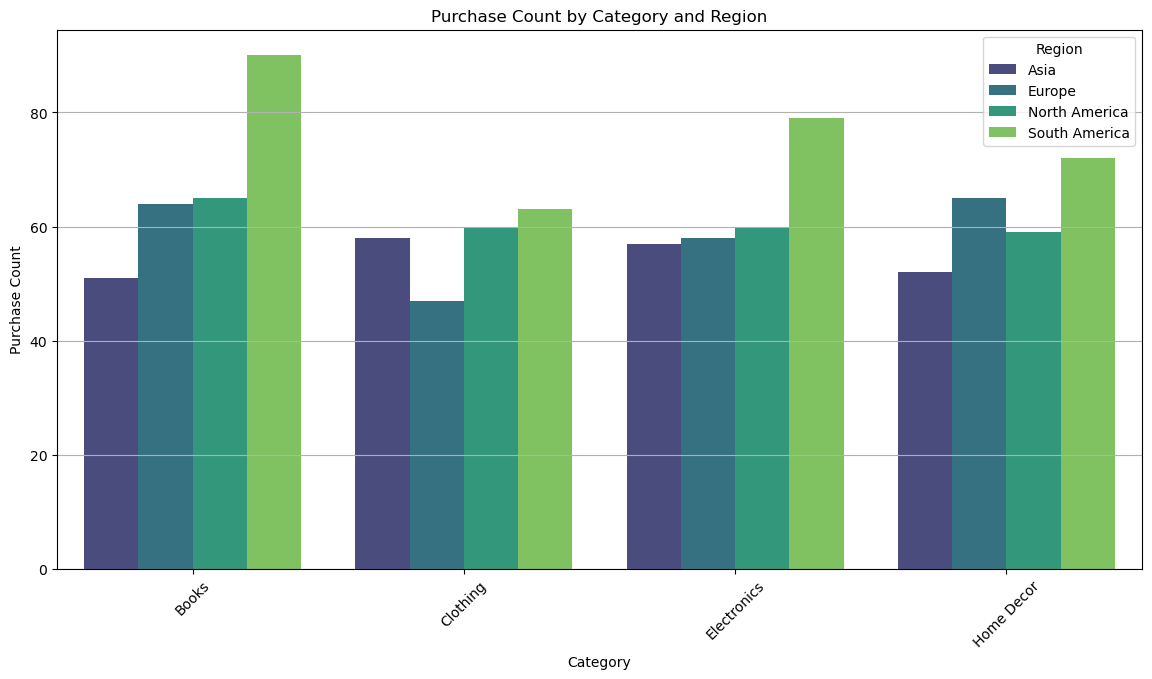

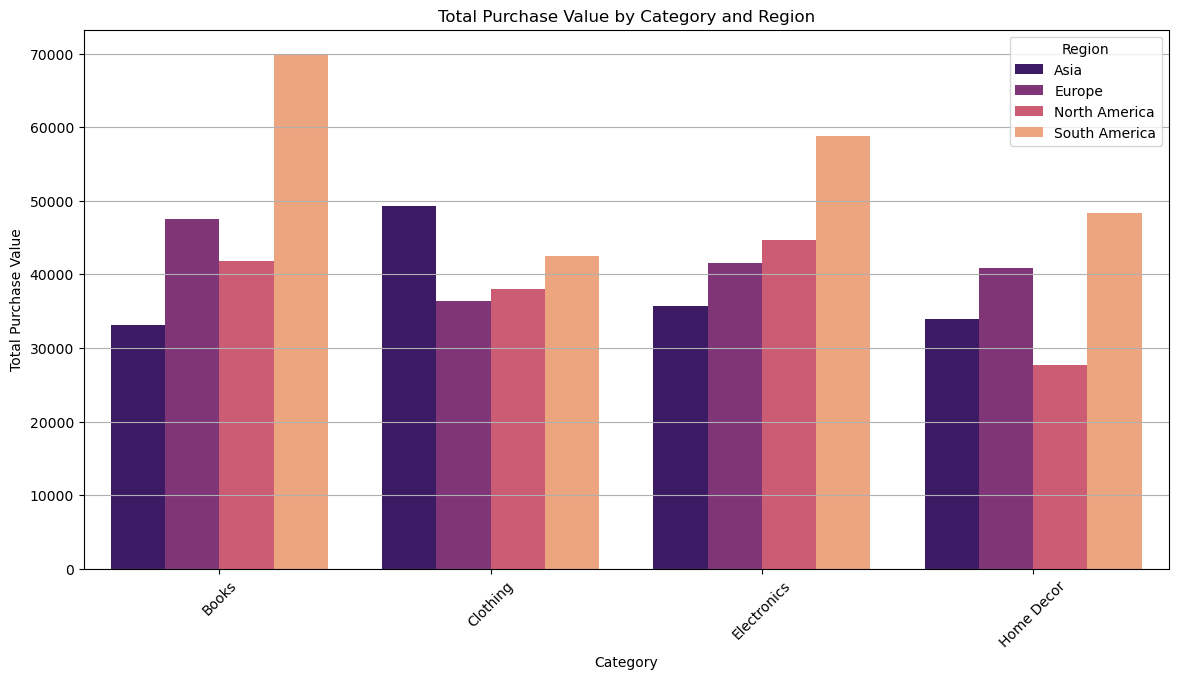

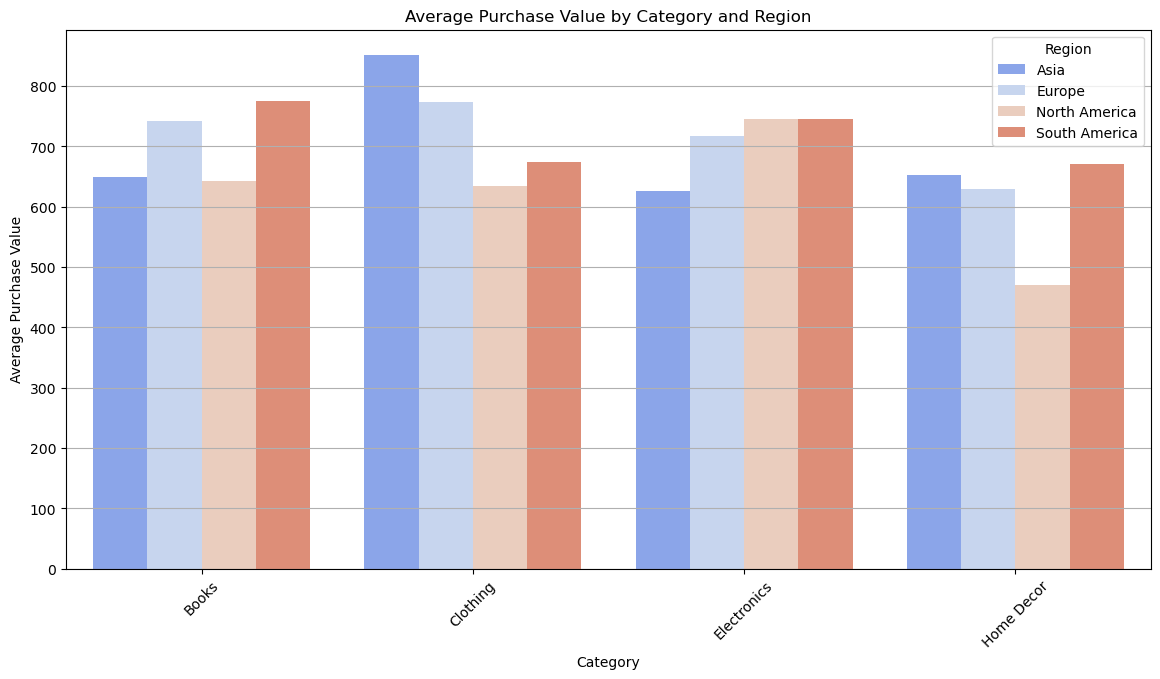

In [48]:

# Merge datasets to include region and category
merged_df = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Compute value_counts, sum, and avg of purchase value for each category in each region
category_region_stats = merged_df.groupby(['Region', 'Category']).agg(
    PurchaseCount=('TotalValue', 'size'),  # Count of purchases
    TotalPurchaseValue=('TotalValue', 'sum'),  # Sum of total purchase value
    AvgPurchaseValue=('TotalValue', 'mean')  # Average purchase value
).reset_index()

# Display the stats for each region and category
print(category_region_stats)

# Visualization: Bar plot for each region and category purchase stats
plt.figure(figsize=(14, 7))

# Plot Purchase Count by Region and Category
sns.barplot(x='Category', y='PurchaseCount', hue='Region', data=category_region_stats, palette='viridis')
plt.title('Purchase Count by Category and Region')
plt.xlabel('Category')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(axis='y')
plt.show()

# Plot Total Purchase Value by Region and Category
plt.figure(figsize=(14, 7))
sns.barplot(x='Category', y='TotalPurchaseValue', hue='Region', data=category_region_stats, palette='magma')
plt.title('Total Purchase Value by Category and Region')
plt.xlabel('Category')
plt.ylabel('Total Purchase Value')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(axis='y')
plt.show()

# Plot Average Purchase Value by Region and Category
plt.figure(figsize=(14, 7))
sns.barplot(x='Category', y='AvgPurchaseValue', hue='Region', data=category_region_stats, palette='coolwarm')
plt.title('Average Purchase Value by Category and Region')
plt.xlabel('Category')
plt.ylabel('Average Purchase Value')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(axis='y')
plt.show()
